# Análise de Carga do Nordeste

## Importando bibliotecas e lendo dataset

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
path = 'carga_Nordeste.csv'

In [3]:
df = pd.read_csv(path, index_col=0, parse_dates=['din_instante']).squeeze()
df.head()

din_instante
2000-01-01 00:00:00    5340.2
2000-01-01 01:00:00    5180.8
2000-01-01 02:00:00    5068.6
2000-01-01 03:00:00    4905.1
2000-01-01 04:00:00    4811.7
Name: val_cargaenergiahomwmed, dtype: float64

## Visualizações básicas

In [ ]:
df.values

In [ ]:
px.line(df, x=df.index, y=df.values)

In [ ]:
px.histogram(df)

In [ ]:
px.line(df.groupby(df.index.year).sum(numeric_only=True))

In [ ]:
px.line(df.loc[df.index.year == 2021])

In [ ]:
consumo_diario = df.groupby(df.index.date).sum(numeric_only=True)
consumo_diario

In [ ]:
consumo_diario.index = pd.to_datetime(consumo_diario.index)

In [ ]:
px.line(consumo_diario.loc[consumo_diario.index.year == 2021])

In [ ]:
consumo20 = df.loc[df.index.year == 2018]
px.line(consumo20.groupby(consumo20.index.month).mean())

In [ ]:
carga_mensal = df.groupby(df.index.month).sum()
carga_mensal

In [ ]:
carga_mensal = df.groupby(df.index.month).sum()
carga_mensal.rename(columns={"val_cargaenergiahomwmed": "Carga_total"}, inplace=True)
for ano in df.groupby(df.index.year).sum().index:
    carga_ano = df.loc[df.index.year == ano]
    carga_ano = carga_ano.groupby(carga_ano.index.month).sum()
    nome_coluna = "carga_"+ str(ano)
    carga_ano.rename(columns={"val_cargaenergiahomwmed": nome_coluna}, inplace=True)
    carga_mensal = carga_mensal.merge(carga_ano, on='din_instante', how='left')
carga_mensal

In [ ]:
px.line(carga_mensal.iloc[:, 17:])

In [ ]:
df.groupby([df.index.year, df.index.month]).sum()

In [ ]:
px.box(df, x=df.index.year, y='val_cargaenergiahomwmed')

In [ ]:
px.box(df)

In [ ]:
df.describe()

In [ ]:
px.scatter(df)

In [ ]:
import math

In [ ]:
math.log(2.3)

In [ ]:
df

In [ ]:
pd.plotting.autocorrelation_plot(df)

## Teste de Estacionariedade

In [ ]:
from statsmodels.tsa import stattools
x = stattools.adfuller(df)
x

In [ ]:
x[1]

In [ ]:
if x[1] <= 0.05:
    print('É estacionario')
else:
    print('Não é estacionário')

In [ ]:
df.describe()

In [ ]:
import numpy as np

In [ ]:
logCarga = np.log(df)
px.histogram(logCarga)

In [ ]:
px.histogram(df)

In [ ]:
df.describe()

## Manipulações com a Carga Diária

In [4]:
carga_diaria = df.groupby(df.index.date).sum()
carga_diaria

2000-01-01    111512.900
2000-01-02    117497.300
2000-01-03    137664.200
2000-01-04    138810.500
2000-01-05    138074.900
                 ...    
2022-12-27    270224.413
2022-12-28    275226.130
2022-12-29    274064.306
2022-12-30    271106.336
2022-12-31    253629.754
Name: val_cargaenergiahomwmed, Length: 8401, dtype: float64

In [5]:
px.histogram(carga_diaria)

In [6]:
px.line(carga_diaria)

In [7]:
log_diaria = np.log(carga_diaria.replace(0, 1))
px.line(log_diaria)

In [8]:
carga_diaria.index = pd.to_datetime(carga_diaria.index)
carga_diaria.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8401, freq=None)

In [9]:
log_diaria.index = pd.to_datetime(log_diaria.index)

In [10]:
stats_log_diaria = adfuller(log_diaria)
stats_log_diaria

(-9.374172557720243,
 7.2420643439254e-16,
 34,
 8366,
 {'1%': -3.4311318918945273,
  '5%': -2.8618855422744667,
  '10%': -2.566953927296654},
 5638.3205660415715)

In [11]:
log_diaria.describe()

count    8401.000000
mean       12.163979
std         0.520980
min         0.000000
25%        11.981868
50%        12.206204
75%        12.391042
max        12.637424
Name: val_cargaenergiahomwmed, dtype: float64

In [12]:
raiz_diaria = np.sqrt(carga_diaria)
px.histogram(raiz_diaria)


In [13]:
from scipy.stats import boxcox
boxcox_diaria = boxcox(carga_diaria, 0.0)
px.histogram(boxcox_diaria)

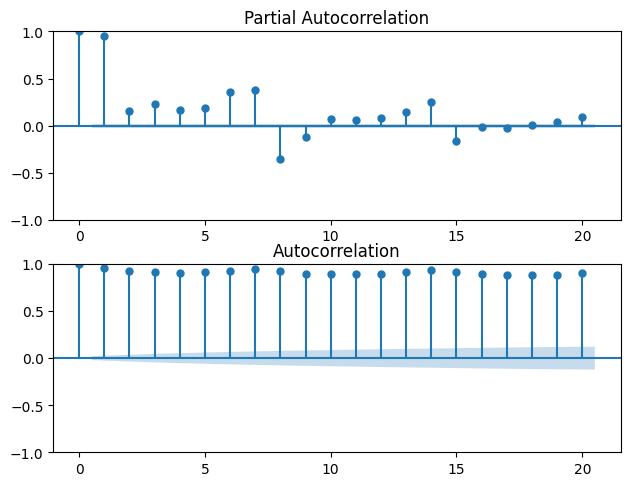

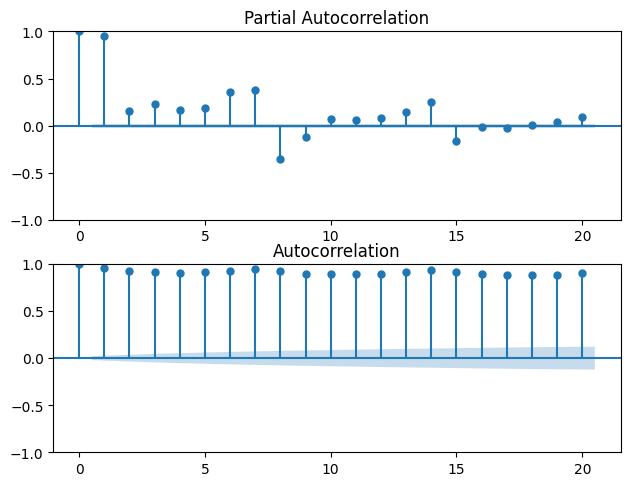

In [14]:
fig, axs = plt.subplots(2)
fig.tight_layout()
plot_pacf(carga_diaria, lags=20, ax=axs[0])
plot_acf(carga_diaria, lags=20, ax=axs[1])

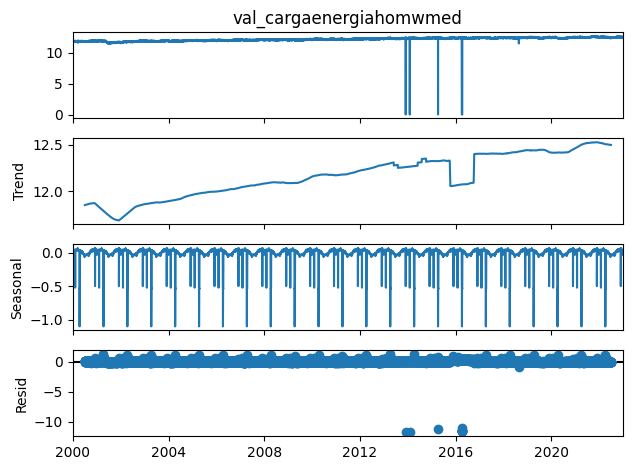

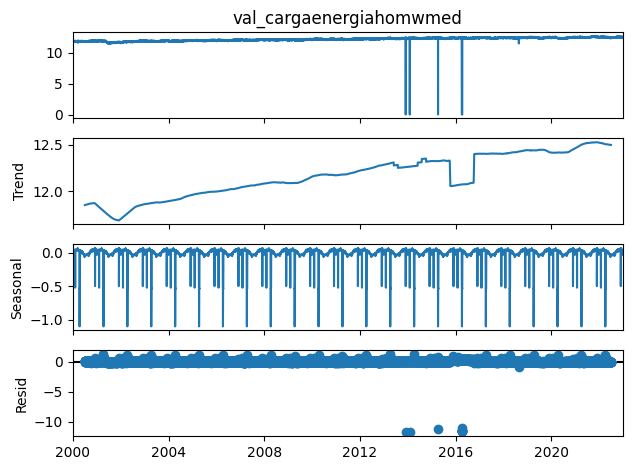

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(log_diaria.replace(0, 0.000001), model='additive', period=365)
result.plot()

In [16]:
adfuller(carga_diaria)

(-1.680921295873316,
 0.4409682337453954,
 35,
 8365,
 {'1%': -3.431131985395069,
  '5%': -2.861885583589818,
  '10%': -2.5669539492891746},
 176458.87694476274)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

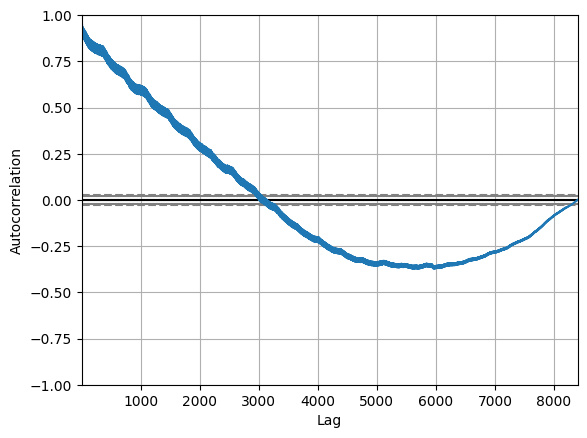

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(carga_diaria.loc[carga_diaria.index.year >= 2000])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

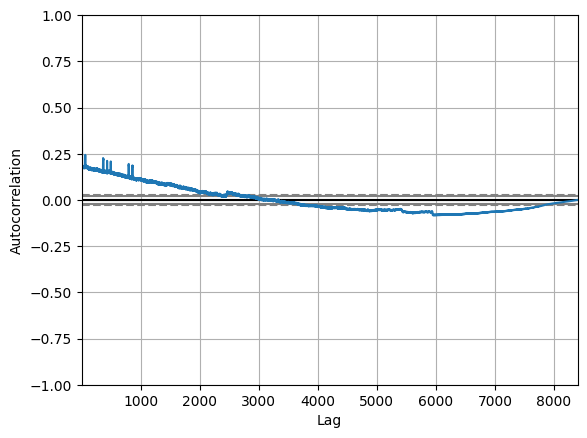

In [18]:
autocorrelation_plot(log_diaria)

In [19]:
px.scatter(log_diaria.drop(labels=log_diaria.loc[log_diaria == 0].index))

c:\Users\herbe\OneDrive\Documentos\ProjetosDS\PROJETO-ST\Projeto-ST\venvST\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [20]:
log_diaria.loc[log_diaria == 0].index

DatetimeIndex(['2013-12-01', '2014-02-01', '2015-04-09', '2016-04-05',
               '2016-04-06', '2016-04-07', '2016-04-08', '2016-04-09',
               '2016-04-10', '2016-04-11', '2016-04-12', '2016-04-13'],
              dtype='datetime64[ns]', freq=None)

In [21]:
log_diaria.drop(labels=log_diaria.loc[log_diaria == 0].index).describe()

count    8389.000000
mean       12.181379
std         0.244599
min        11.447932
25%        11.982982
50%        12.206809
75%        12.391138
max        12.637424
Name: val_cargaenergiahomwmed, dtype: float64

In [22]:
carga_diaria.describe()

count      8401.000000
mean     200572.579995
std       47672.626365
min           0.000000
25%      159830.280000
50%      200026.330000
75%      240636.260308
max      307867.379000
Name: val_cargaenergiahomwmed, dtype: float64

In [23]:
px.scatter(carga_diaria.drop(labels=carga_diaria.loc[carga_diaria == 0].index))

c:\Users\herbe\OneDrive\Documentos\ProjetosDS\PROJETO-ST\Projeto-ST\venvST\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [24]:
carga_diaria.drop(labels=carga_diaria.loc[carga_diaria == 0].index).describe()

count      8389.000000
mean     200859.487965
std       47098.785290
min       93707.400000
25%      160008.530000
50%      200147.310000
75%      240659.312000
max      307867.379000
Name: val_cargaenergiahomwmed, dtype: float64

## Decomposição da Carga diária

In [25]:
carga_diaria_cleaned = carga_diaria.drop(labels=carga_diaria.loc[carga_diaria == 0].index)

In [26]:
result = seasonal_decompose(carga_diaria_cleaned, model='additive', period=365)
#result.plot()

In [27]:
print(f'Tendencia: {result.trend}')
print(f'Sazonalidade: {result.seasonal}')
print(f'Residuo: {result.resid}')
print(f'Observado: {result.observed}')

Tendencia: 2000-01-01   NaN
2000-01-02   NaN
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
              ..
2022-12-27   NaN
2022-12-28   NaN
2022-12-29   NaN
2022-12-30   NaN
2022-12-31   NaN
Name: trend, Length: 8389, dtype: float64
Sazonalidade: 2000-01-01    1087.399184
2000-01-02   -3660.805791
2000-01-03   -8310.739942
2000-01-04   -7673.976704
2000-01-05   -1372.602056
                 ...     
2022-12-27    2181.745545
2022-12-28    3154.906042
2022-12-29    2428.371919
2022-12-30    1152.670789
2022-12-31   -6071.411426
Name: seasonal, Length: 8389, dtype: float64
Residuo: 2000-01-01   NaN
2000-01-02   NaN
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
              ..
2022-12-27   NaN
2022-12-28   NaN
2022-12-29   NaN
2022-12-30   NaN
2022-12-31   NaN
Name: resid, Length: 8389, dtype: float64
Observado: 2000-01-01    111512.900
2000-01-02    117497.300
2000-01-03    137664.200
2000-01-04    138810.500
2000-01-05    138074.900
                 ...    
2022-12-27    27

## Usando e Removendo Tendência

### Removendo Trend por Diferenciação

In [28]:
carga_diaria.values

array([111512.89999995, 117497.29999992, 137664.19999994, ...,
       274064.3059999 , 271106.33599986, 253629.75399985])

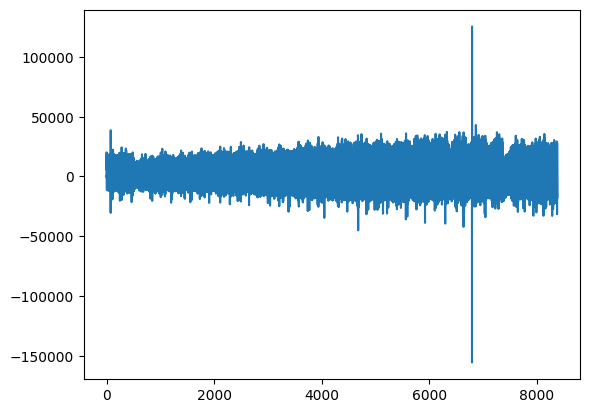

In [29]:
values = carga_diaria_cleaned.values
diff = list()
for i in range(1, len(values)):
    aux = values[i] - values[i-1]
    diff.append(aux)
plt.plot(diff)

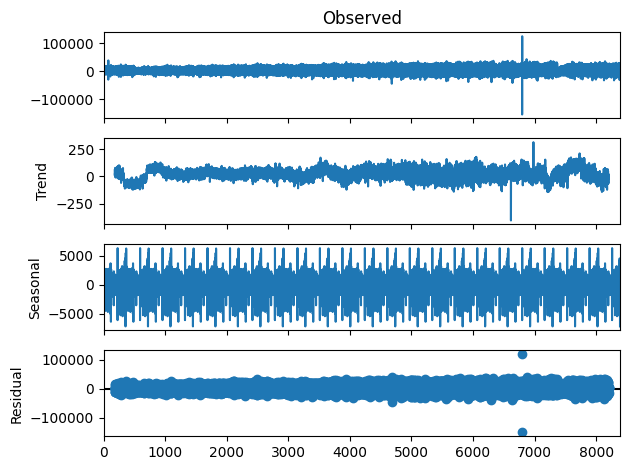

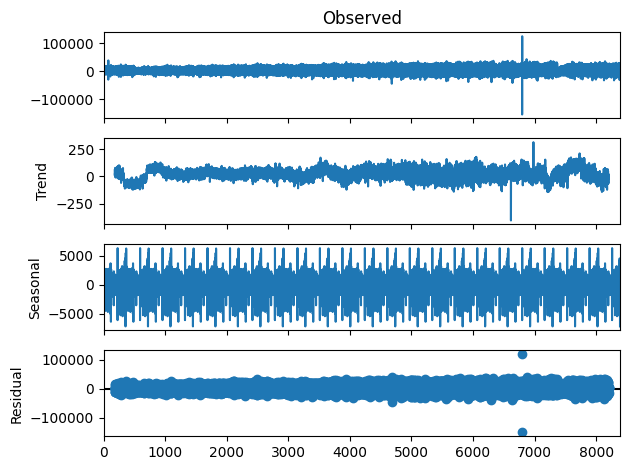

In [30]:
seasonal_decompose(diff, model='additive', period=365).plot()

### Removendo por Ajuste de Modelo

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
X = [i for i in range(0, len(carga_diaria_cleaned))]
X = np.reshape(X, (len(X), 1))
y = carga_diaria_cleaned.values

In [33]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

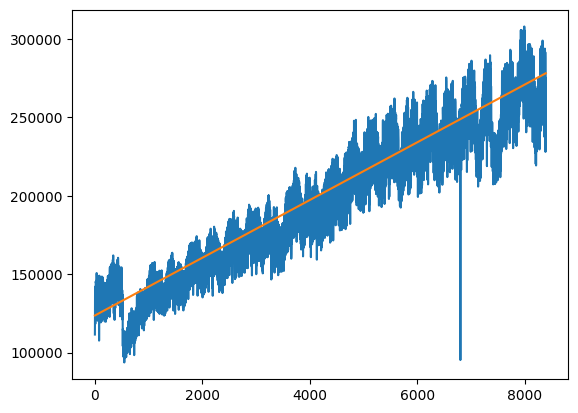

In [34]:
trend = model.predict(X)
plt.plot(y)
plt.plot(trend)

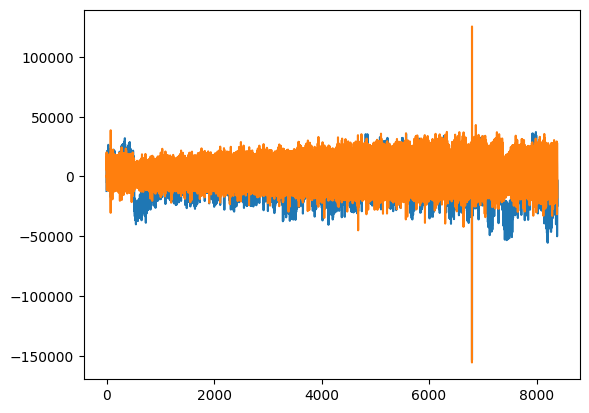

In [35]:
detrended = [y[i]-trend[i] for i in range(0, len(carga_diaria_cleaned))]
plt.plot(detrended)
plt.plot(diff)

## Identificando e Removendo Sazonalidade

In [39]:
carga_diaria_cleaned.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8389, freq=None)

In [40]:
px.line(carga_diaria_cleaned)

c:\Users\herbe\OneDrive\Documentos\ProjetosDS\PROJETO-ST\Projeto-ST\venvST\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [53]:
y = [i for i in range(0, len(detrended))]
len(y)

8389

In [54]:
len(detrended)

8389

In [72]:
X = [i for i in range(0, len(detrended))]
y = detrended
degree = 6
coef = np.polyfit(X, y, degree)
print(f'Coefficients: {coef}')

Coefficients: [ 2.23286655e-17 -5.58859487e-13  5.36244631e-09 -2.49566051e-05
  5.86260226e-02 -6.31627034e+01  1.95439915e+04]


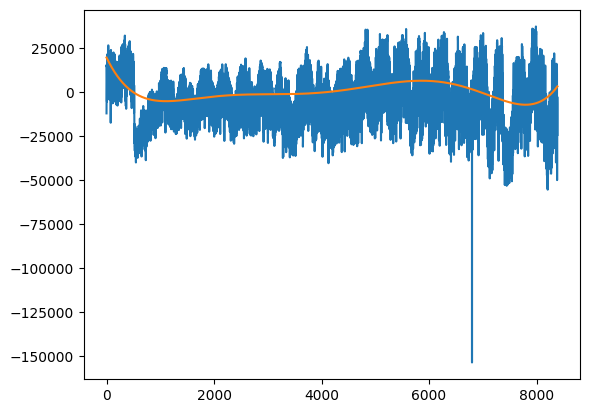

In [73]:
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d)*coef[d]
    curve.append(value)

plt.plot(detrended)
plt.plot(curve)

In [64]:
coef

array([ 7.01594001e-11, -1.47140085e-06,  9.87981448e-03, -2.28227203e+01,
        1.16392146e+04])

In [75]:
2**3*2

16